In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cell2location
from matplotlib import rcParams
from cell2location.utils.filtering import filter_genes

from cell2location.models import RegressionModel

rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs

results_folder = 'cell2location/results/lymph_nodes_analysis/'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}reference_signatures'
run_name = f'{results_folder}/cell2location_map'

In [2]:
adata_file = f"{run_name}/sp_map.h5ad"
adata_vis = sc.read_h5ad(adata_file)

In [3]:
from cell2location import run_colocation

In [4]:
res_dict, adata_vis = run_colocation(
    adata_vis,
    model_name='CoLocatedGroupsSklearnNMF',
    train_args={
      'n_fact': np.arange(11, 13), # IMPORTANT: use a wider range of the number of factors (5-30)
      'sample_name_col': 'sample', # columns in adata_vis.obs that identifies sample
      'n_restarts': 3 # number of training restarts
    },
    # the hyperparameters of NMF can be also adjusted:
    model_kwargs={'alpha': 0.01, 'init': 'random', "nmf_kwd_args": {"tol": 0.000001}},
    export_args={'path': f'{run_name}/CoLocatedComb/'}
)

### Analysis name: CoLocatedGroupsSklearnNMF_11combinations_4035locations_34factors


[03/09/25 12:22:38] WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=378657;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=665643;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/cell2location/run_colocation.py:384                
                             : FutureWarning: Use `squidpy.pl.spatial_scatter` instead.                            
                               sc.pl.spatial(                                                                      
                                                                                                                   

### Analysis name: CoLocatedGroupsSklearnNMF_12combinations_4035locations_34factors


[03/09/25 12:22:58] WARNING  /storage-a/users_data/jupyter/vapolonio/hexcore-project/hexcore-projec ]8;id=86324;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=734311;file:///home/biosis-gpu/anaconda3/lib/python3.12/warnings.py#112\112]8;;\
                             t-env/lib/python3.12/site-packages/cell2location/run_colocation.py:384                
                             : FutureWarning: Use `squidpy.pl.spatial_scatter` instead.                            
                               sc.pl.spatial(                                                                      
                                                                                                                   

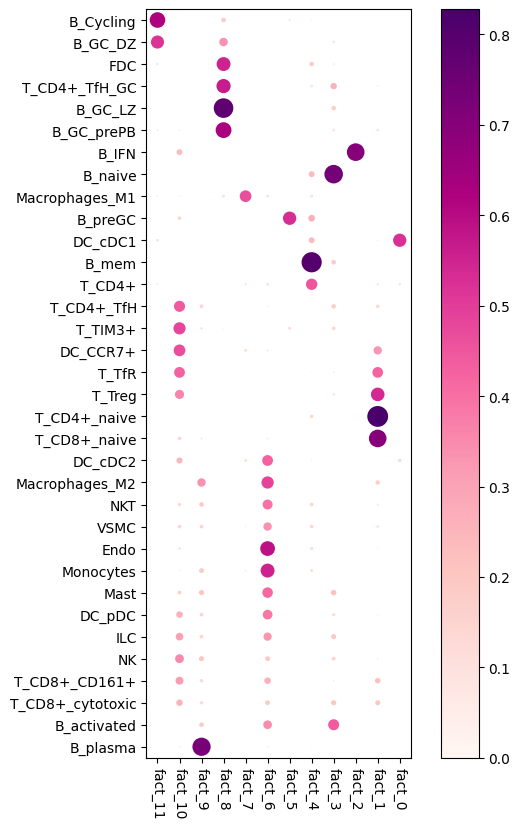

In [5]:
# Here we plot the NMF weights (Same as saved to `cell_type_fractions_heatmap`)
res_dict['n_fact12']['mod'].plot_cell_type_loadings()